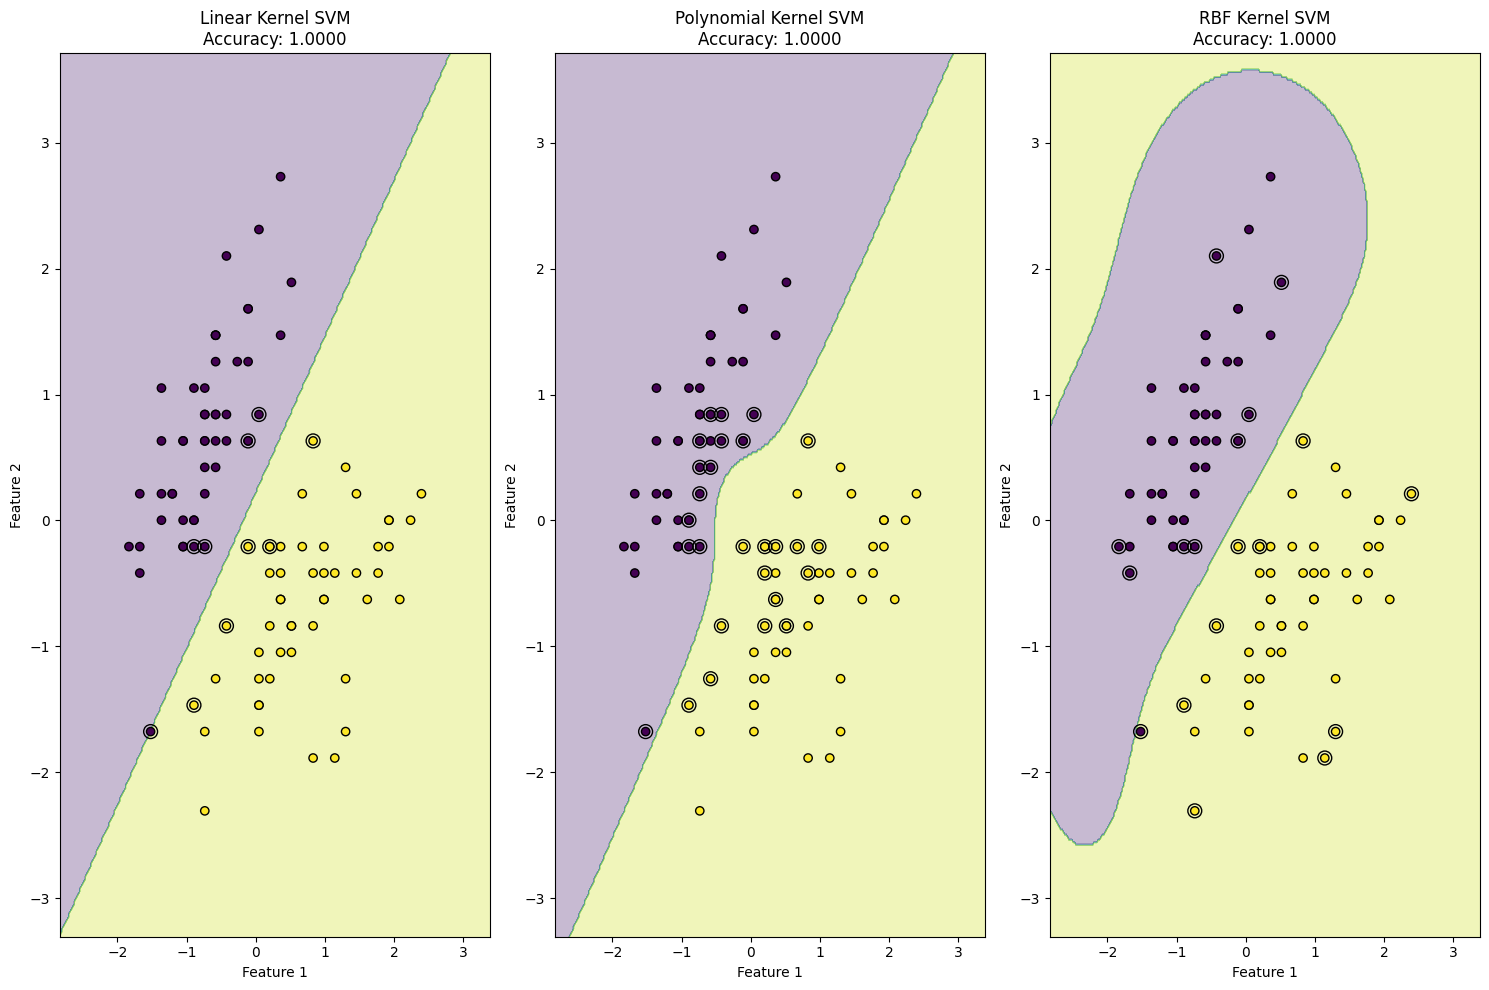

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Binary classification for simplicity (setosa vs. rest)
X = X[y != 2]
y = y[y != 2]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models with different kernels
models = {
    'Linear': svm.SVC(kernel='linear', C=1),
    'Polynomial': svm.SVC(kernel='poly', degree=3, C=1),
    'RBF': svm.SVC(kernel='rbf', gamma=0.7, C=1)
}

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, models):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    plt.figure(figsize=(15, 10))
    
    for i, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        plt.subplot(1, 3, i + 1)
        
        # Plot the decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        
        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        
        # Highlight support vectors
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='k')
        
        plt.title(f"{name} Kernel SVM\nAccuracy: {accuracy:.4f}")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

plot_decision_boundaries(X, y, models)